In [2]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [3]:
df=pd.read_csv('/content/train (1).csv',usecols=['Age','Fare','Survived'])

In [4]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

<ipython-input-5-26113ea9078d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [6]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [7]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [8]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=42)

<ipython-input-9-fbe7e66121a6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


Text(0.5, 1.0, 'Age QQ Plot')

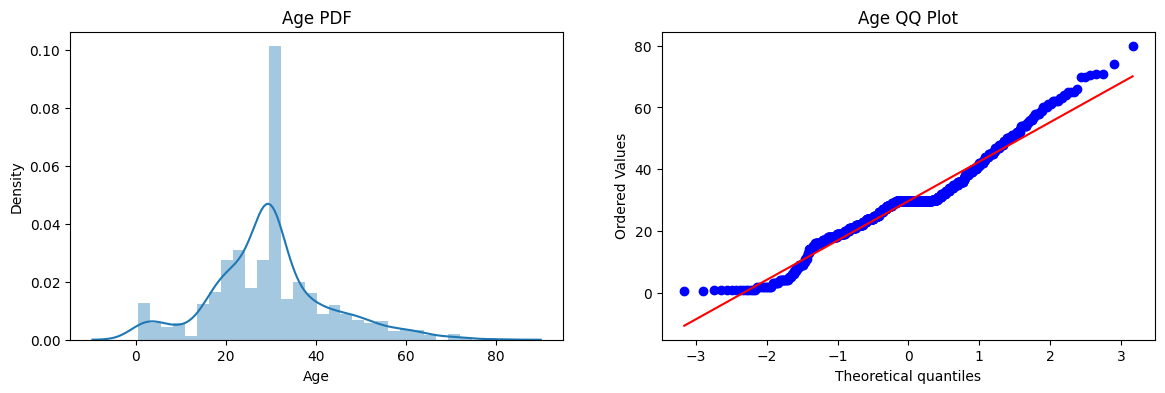

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Age'])
plt.title('Age PDF')
plt.subplot(122)
stats.probplot(df['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')

<ipython-input-10-3a184ec7b986>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


Text(0.5, 1.0, 'Fare QQ Plot')

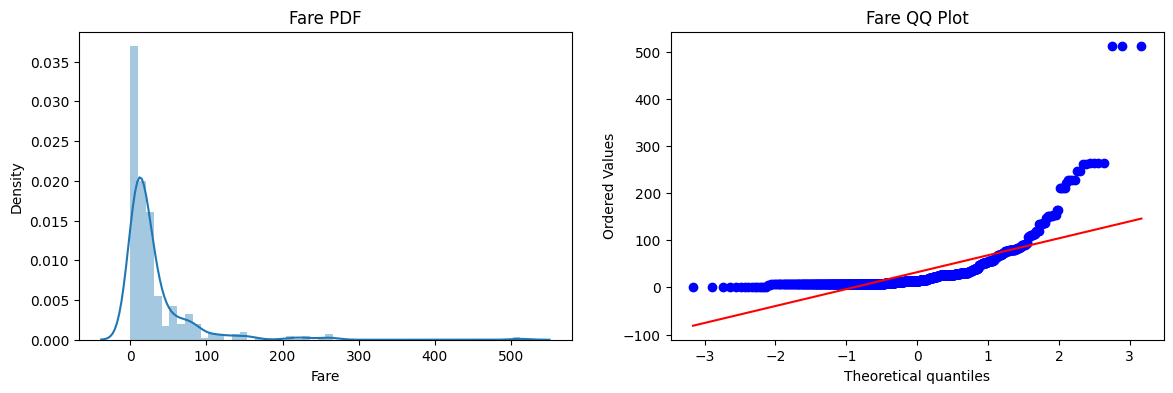

In [10]:
 # totally right skewed so it is not normal dist
 plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Fare'])
plt.title('Fare PDF')
plt.subplot(122)
stats.probplot(df['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot')

In [34]:
clf= LogisticRegression()



In [35]:
clf1=DecisionTreeClassifier()

In [36]:
clf.fit(x_tr,y_tr)
clf1.fit(x_tr,y_tr)
y_pr=clf.predict(x_te)
y_pr2=clf1.predict(x_te)
print("Acc LR",accuracy_score(y_te,y_pr))
print("Acc DT",accuracy_score(y_te,y_pr2))

Acc LR 0.6480446927374302
Acc DT 0.6703910614525139


In [37]:
trf=FunctionTransformer(func=np.log1p)# logp can be use if weif it has no 0,use of log1p it add 1 in input

In [38]:
x_tr_tran=trf.fit_transform(x_tr)
x_te_tran=trf.transform(x_te)

In [39]:
clf.fit(x_tr_tran,y_tr)# it inrease logistic regression
clf1.fit(x_tr_tran,y_tr)
y_pr=clf.predict(x_te_tran)
y_pr2=clf1.predict(x_te_tran)
print("Acc LR",accuracy_score(y_te,y_pr))
print("Acc DT",accuracy_score(y_te,y_pr2))

Acc LR 0.6815642458100558
Acc DT 0.6703910614525139


## Fare became better

Text(0.5, 1.0, 'Fare after')

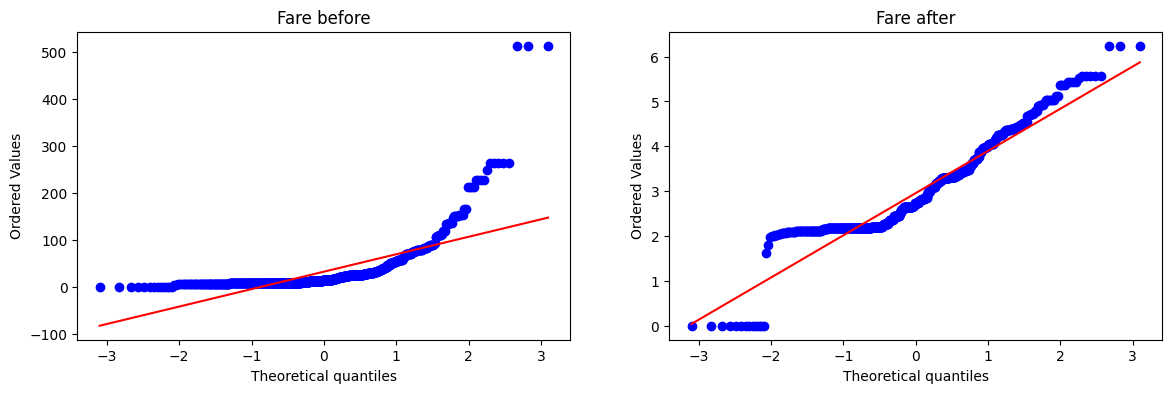

In [40]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_tr['Fare'],dist='norm',plot=plt)
plt.title('Fare before')
plt.subplot(122)
stats.probplot(x_tr_tran['Fare'],dist='norm',plot=plt)
plt.title('Fare after')

# Age is less near normal distribution shouldnt apply on it

Text(0.5, 1.0, 'Age after')

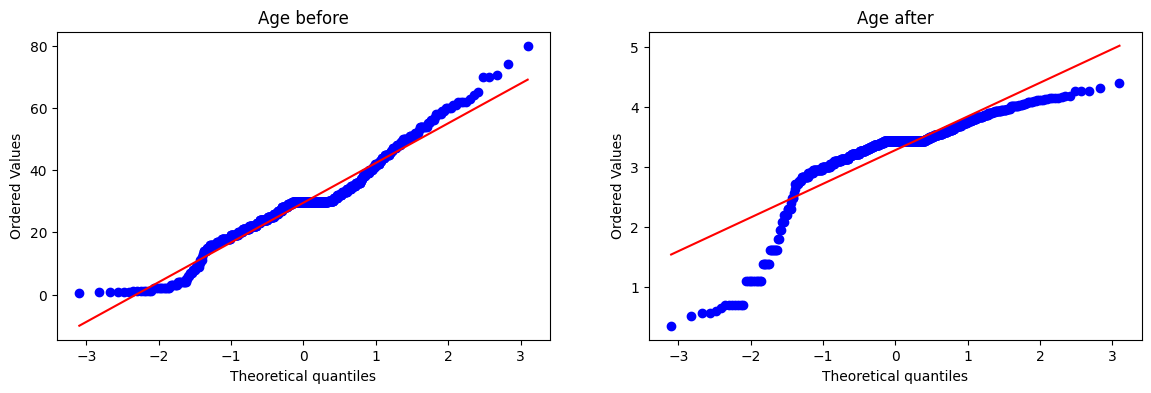

In [41]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_tr['Age'],dist='norm',plot=plt)
plt.title('Age before')
plt.subplot(122)
stats.probplot(x_tr_tran['Age'],dist='norm',plot=plt)
plt.title('Age after')

In [42]:

trf2= ColumnTransformer([
    ('log',FunctionTransformer(np.log1p),['Fare'])
],remainder='passthrough')

In [23]:
x_tr_tran1=trf2.fit_transform(x_tr)

In [27]:
x_te_tran1=trf2.transform(x_te)

In [28]:
clf=LogisticRegression()
clf1=DecisionTreeClassifier()

In [31]:
clf.fit(x_tr_tran1,y_tr)


LogisticRegression()

In [32]:
clf1.fit(x_tr_tran1,y_tr)

DecisionTreeClassifier()

In [33]:
y_pr=clf.predict(x_te_tran1)
y_pr2=clf1.predict(x_te_tran1)
print("Acc LR",accuracy_score(y_te,y_pr))
print("Acc DT",accuracy_score(y_te,y_pr2))

Acc LR 0.6703910614525139
Acc DT 0.6815642458100558


Text(0.5, 1.0, 'Fare after')

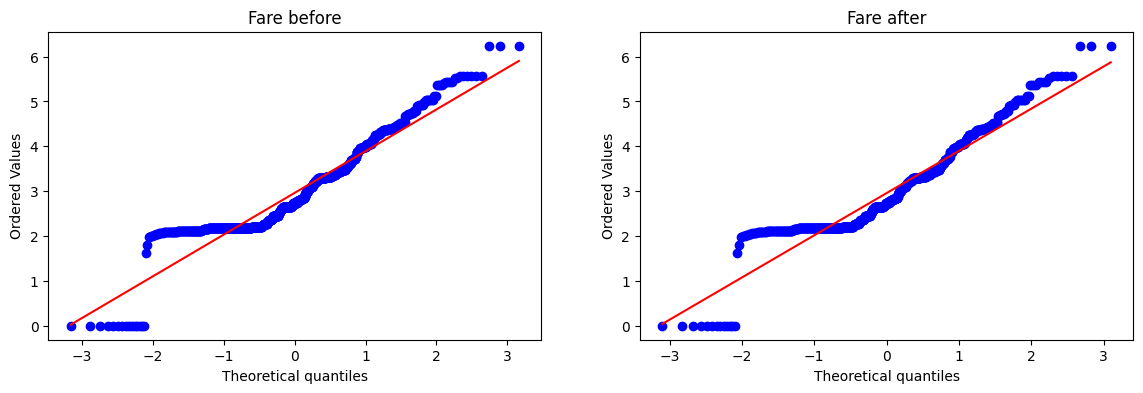

In [76]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_tr['Fare'],dist='norm',plot=plt)
plt.title('Fare before')
plt.subplot(122)
stats.probplot(x_tr_tran1[:,0],dist='norm',plot=plt) # when u put col trans always use index
plt.title('Fare after')

# Function

In [72]:
def apply_transform(transform):
  x=df.iloc[:,1:3]
  y=df.iloc[:,0]
  trf3= ColumnTransformer([
  ('log',FunctionTransformer(transform),['Fare'])
  ],remainder='passthrough')
  x_trn = trf3.fit_transform(x)
  clf = LogisticRegression()
  print("Accuracy",np.mean(cross_val_score(clf,x_trn,y,scoring='accuracy',cv=10)))
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  stats.probplot(x['Fare'],dist='norm',plot=plt)
  plt.title('Fare before')
  plt.subplot(122)
  stats.probplot(x_trn[:,0],dist='norm',plot=plt)
  plt.title('Fare after')
  plt.show()

Accuracy 0.61729088639201


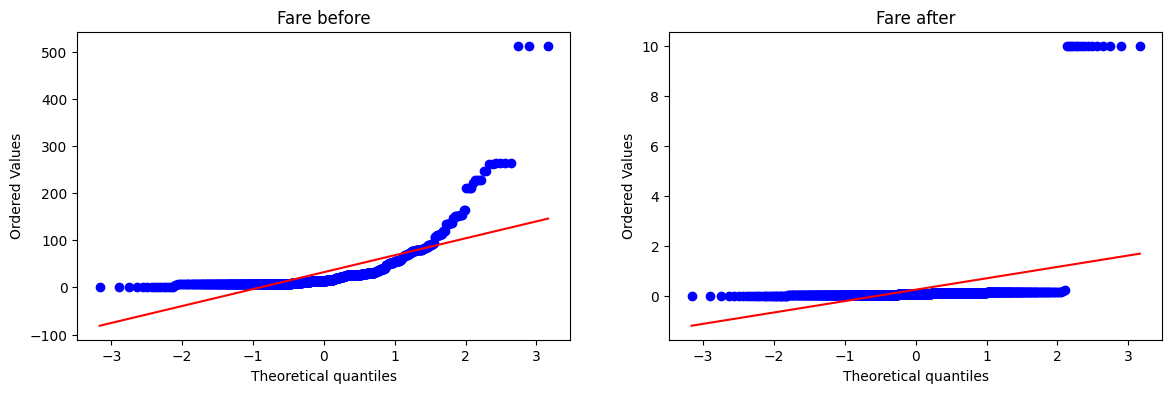

In [81]:
apply_transform(lambda x : 1/(x+0.1))

Accuracy 0.6262796504369538


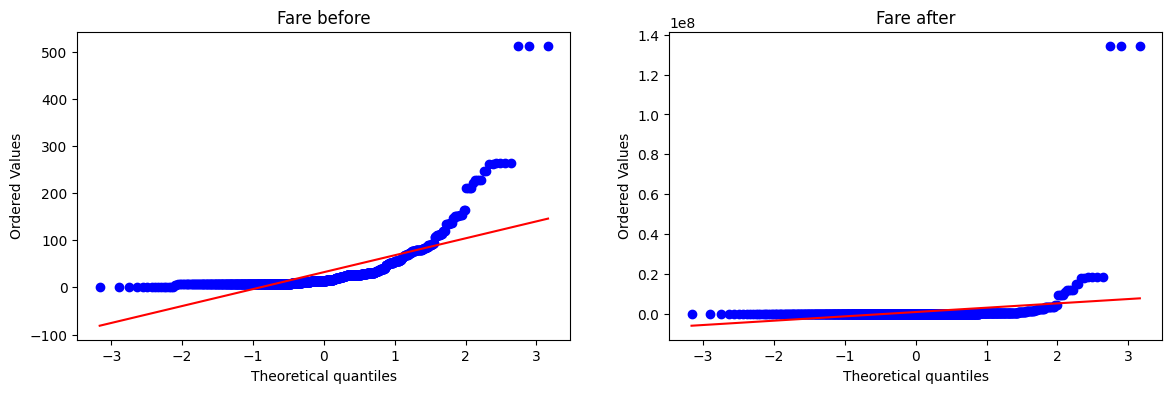

In [82]:
apply_transform(lambda x : x**3)